<a href="https://colab.research.google.com/github/ttran293/Vietnam-Happiness-Score/blob/main/vietnam_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vietnam's happiness rank among the Southeast Asia countries

# Introduction

**Dataset Author**: Ajaypal Singh

**Context**: The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**Content**: The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

My work is referenced of Dimitri Irfan, Indonesia Happiness Report. It is such an eye opening visualization. 

In [30]:
from IPython.display import HTML

def hide_code():
	return HTML('''<script>
	code_show=true; 
	function code_toggle() {
	 if (code_show){
	 $("div.input").hide();
	 } else {
	 $("div.input").show();
	 }
	 code_show = !code_show
	} 
	$( document ).ready(code_toggle);
	</script>
	The raw code for this IPython notebook is by default hidden for easier reading.
	To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [31]:
# Saved dataset on Github
data = pd.read_csv('https://raw.githubusercontent.com/ttran293/Vietnam-Happiness-Score/main/world-happiness-report.csv')
data_2021= pd.read_csv('https://raw.githubusercontent.com/ttran293/Vietnam-Happiness-Score/main/world-happiness-report-2021.csv')
#data = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report.csv')
#data_2021 = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')

In [32]:
pd.set_option('display.max_rows', None)
data_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [33]:
data_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [34]:
#@title
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

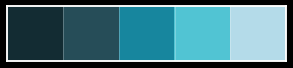

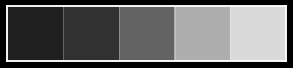

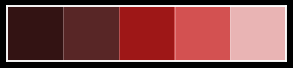

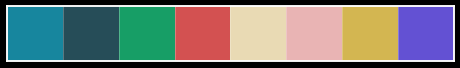

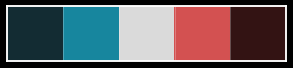

In [35]:
#@title
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [36]:
#@title
SEA = data_2021[data_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()
EA = data_2021[data_2021['Regional indicator'] == "East Asia"]['Country name'].to_list()
SA = data_2021[data_2021['Regional indicator'] == "South Asia"]['Country name'].to_list()
ASIA = SEA + EA + SA

#@title
def getSea(row) : 
    if row['Country name'] == "Vietnam" : 
        return "Vietnam"
    elif row['Country name'] in SEA : 
        return "SEA"
    else : 
        return "Other"
    
#@title
def getA(row) : 
    if row['Country name'] == "Vietnam" : 
        return "Vietnam"
    elif row['Country name'] in ASIA : 
        return "SEA"
    else : 
        return "Other"
    
sns.set(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})

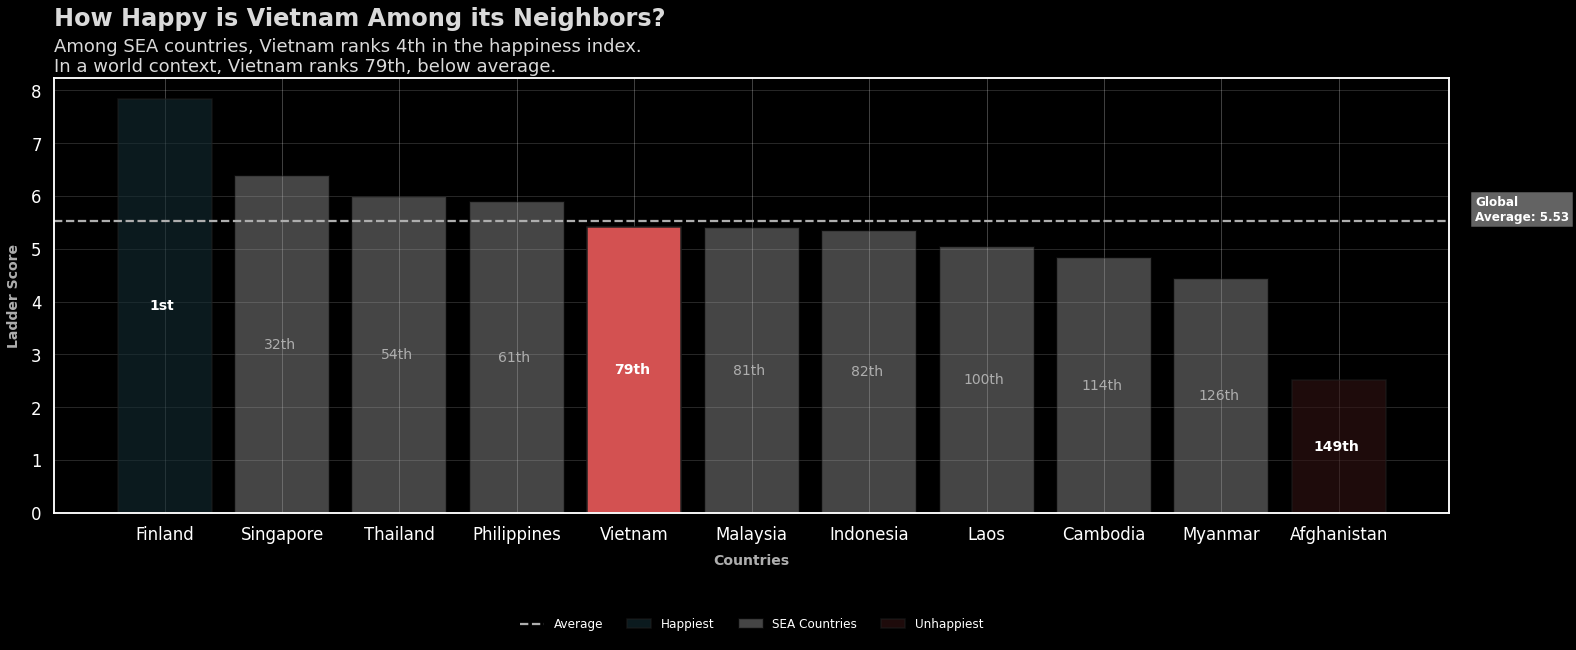

In [37]:
#@title
df = data_2021[data_2021['Country name'].isin(SEA)]
data_2021_top = data_2021.iloc[0:1]
data_2021_bot = data_2021.iloc[-1]
mean_score = data_2021['Ladder score'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(25, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Ladder score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Ladder score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Ladder score'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[3])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Ladder Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[3].set_alpha(1)
bars1[3].set_color(colors_red[3])
bars1[3].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 3 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )

plt.text(s="How Happy is Vietnam Among its Neighbors?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("Among SEA countries, Vietnam ranks 4th in the happiness index.\nIn a world context, Vietnam ranks 79th, below average.", loc='left', fontsize=18, color=colors_dark[4])  

plt.show()

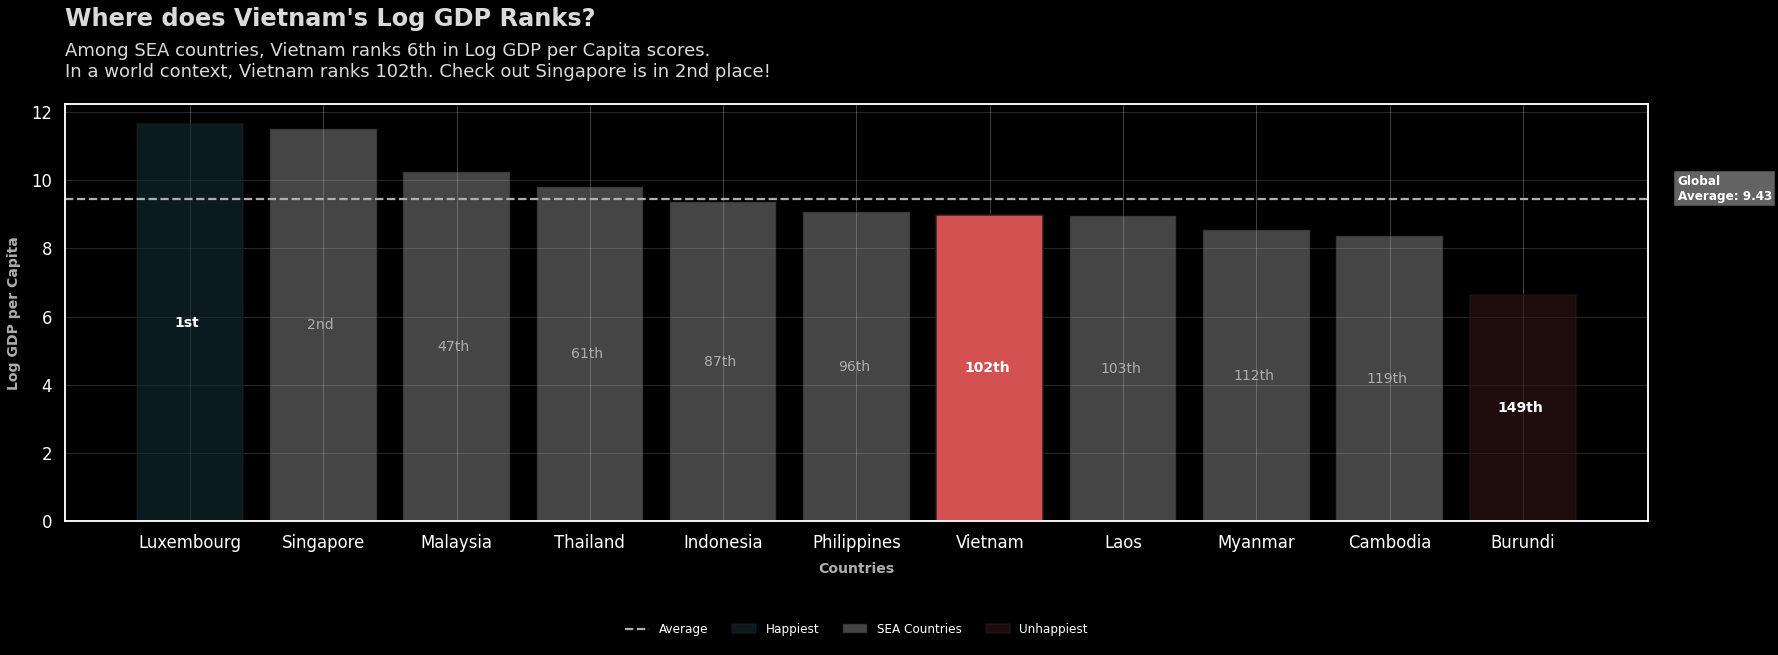

In [38]:
#@title
##### @title
df_glob = data_2021.sort_values("Logged GDP per capita", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Logged GDP per capita'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(25, 10))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Logged GDP per capita'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Logged GDP per capita'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Logged GDP per capita'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[3])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Log GDP per Capita", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[5].set_alpha(1)
bars1[5].set_color(colors_red[3])
bars1[5].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i == 0 : 
        ax.text(
            s=f"{sea_idx[i]}nd",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    elif i != 5 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Log GDP Ranks?\n", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("Among SEA countries, Vietnam ranks 6th in Log GDP per Capita scores.\nIn a world context, Vietnam ranks 102th. Check out Singapore is in 2nd place!\n", loc='left', fontsize=18, color=colors_dark[4])  
plt.tight_layout()
plt.show()

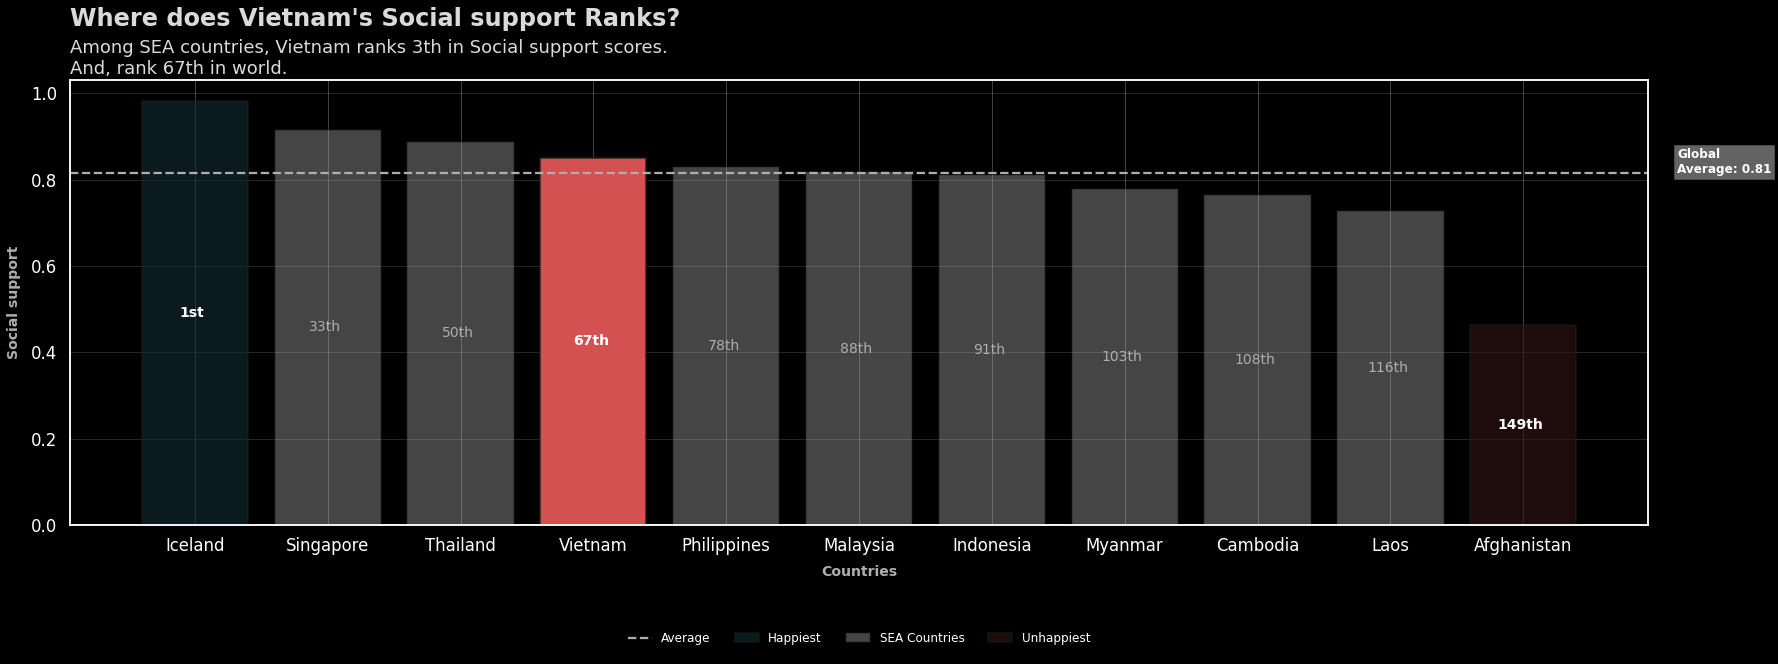

In [39]:
#@title
df_glob = data_2021.sort_values("Social support", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Social support'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(25, 10))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Social support'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Social support'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Social support'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[3])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Social support", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[2].set_alpha(1)
bars1[2].set_color(colors_red[3])
bars1[2].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 2 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Social support Ranks?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("Among SEA countries, Vietnam ranks 3th in Social support scores.\nAnd, rank 67th in world.", loc='left', fontsize=18, color=colors_dark[4])  
plt.tight_layout()
plt.show()

In [40]:
#@title
SEA = data_2021[data_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()

#to remove singapore since it's 1st in the graph below and mess up the data
SEA.pop(0)


'Singapore'

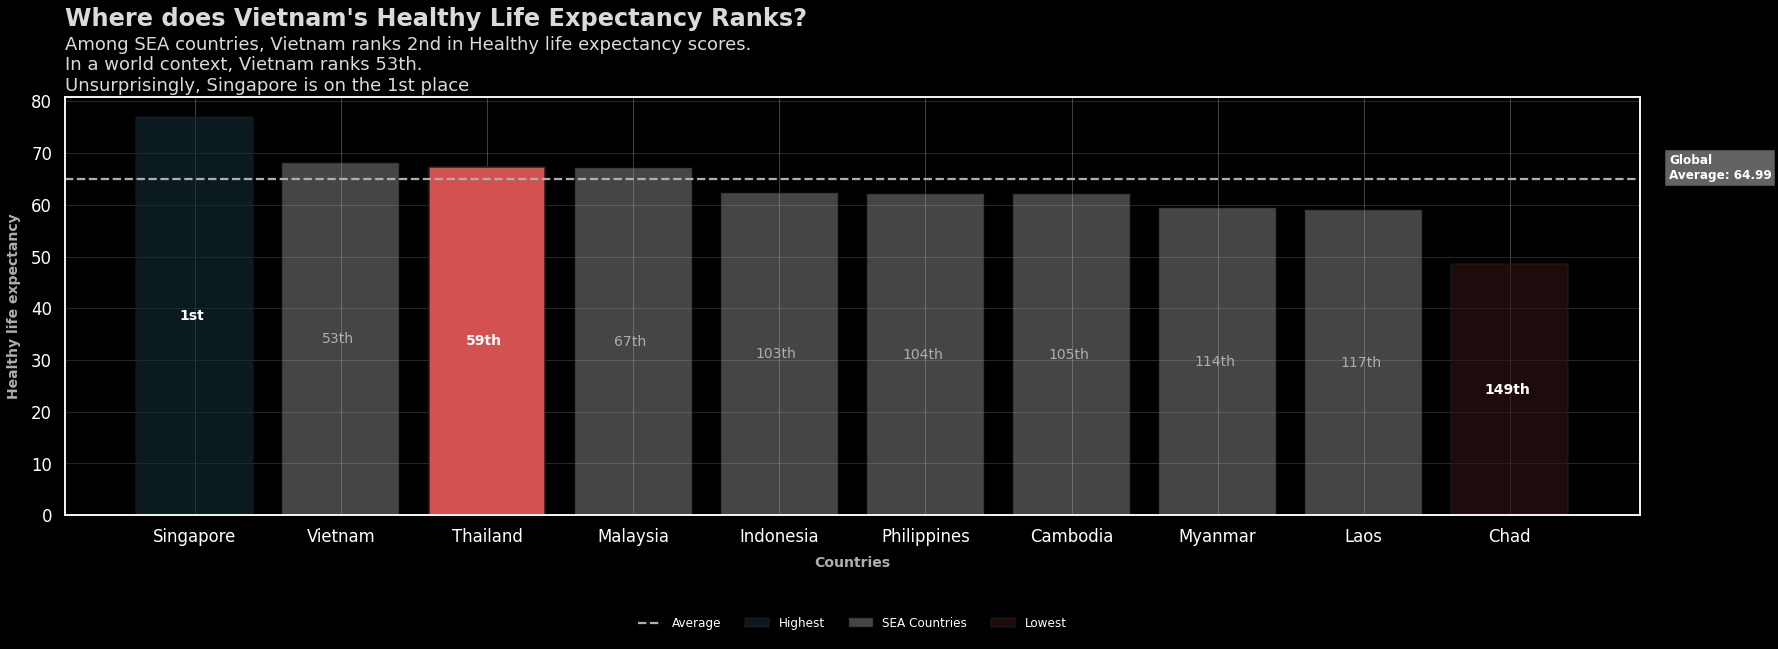

In [41]:
#@title
df_glob = data_2021.sort_values("Healthy life expectancy", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Healthy life expectancy'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(25, 10))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Healthy life expectancy'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Healthy life expectancy'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Healthy life expectancy'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[3])

ax.legend(["Average", "Highest", "SEA Countries", "Lowest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Healthy life expectancy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[1].set_alpha(1)
bars1[1].set_color(colors_red[3])
bars1[1].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 1: 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Healthy Life Expectancy Ranks?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("Among SEA countries, Vietnam ranks 2nd in Healthy life expectancy scores.\nIn a world context, Vietnam ranks 53th.\nUnsurprisingly, Singapore is on the 1st place", loc='left', fontsize=18, color=colors_dark[4])  
plt.tight_layout()
plt.show()

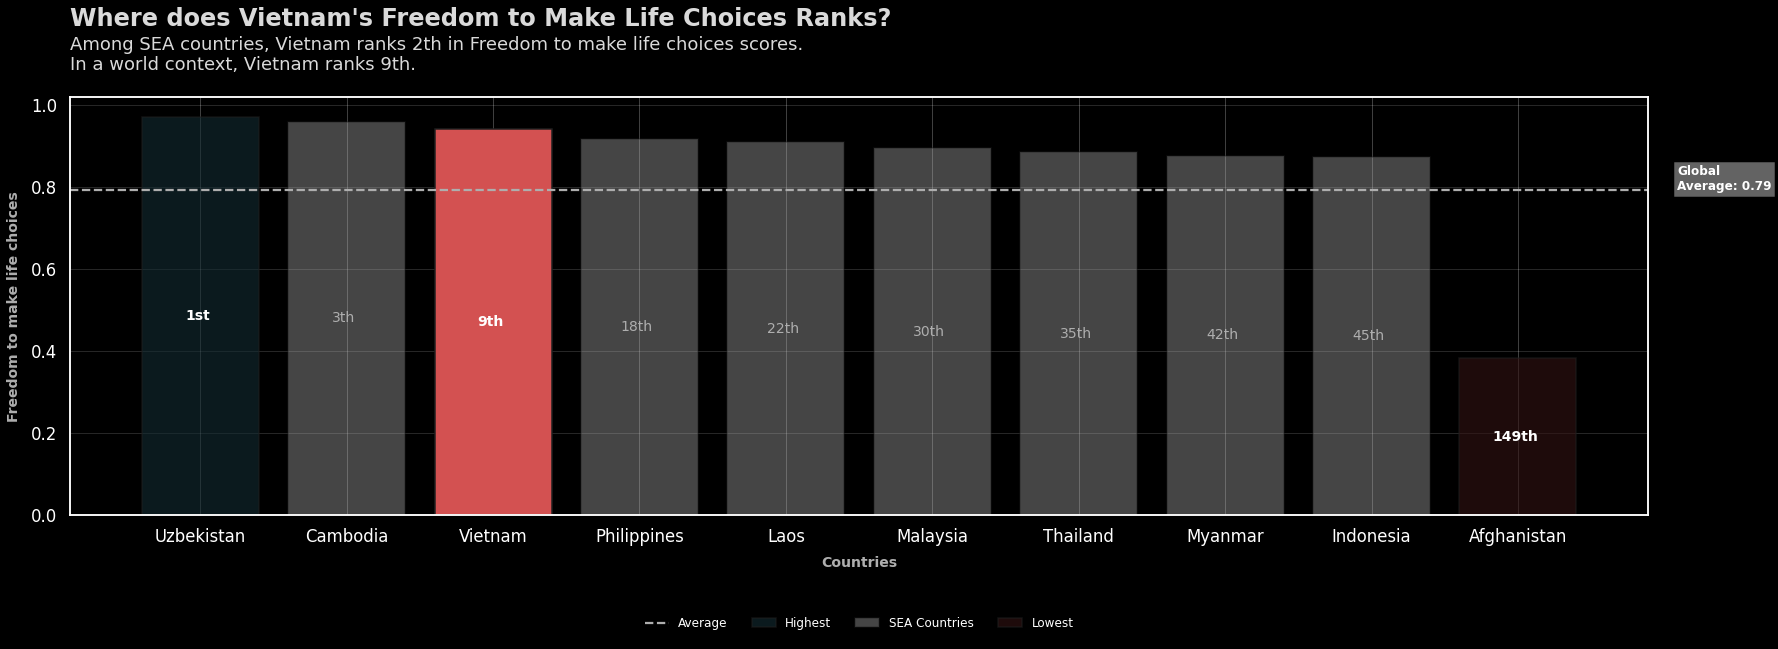

In [42]:
#@title
df_glob = data_2021.sort_values("Freedom to make life choices", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Freedom to make life choices'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(25, 10))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Freedom to make life choices'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Freedom to make life choices'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Freedom to make life choices'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[3])

ax.legend(["Average", "Highest", "SEA Countries", "Lowest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Freedom to make life choices", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[1].set_alpha(1)
bars1[1].set_color(colors_red[3])
bars1[1].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 1 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Freedom to Make Life Choices Ranks?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("Among SEA countries, Vietnam ranks 2th in Freedom to make life choices scores.\nIn a world context, Vietnam ranks 9th.\n", loc='left', fontsize=18, color=colors_dark[4])  
plt.tight_layout()
plt.show()

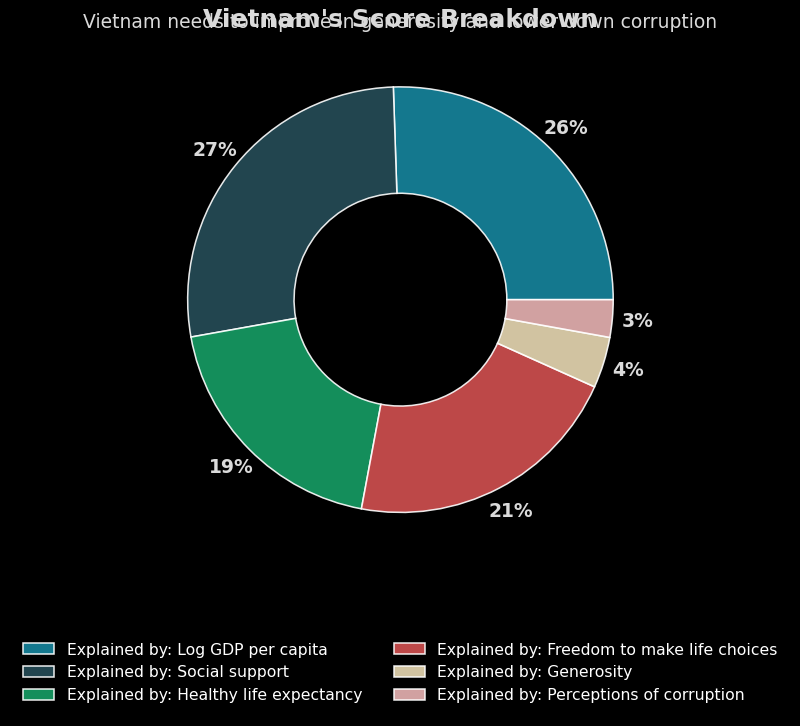

In [43]:
#@title
components = list(data_2021.columns[-7:-1])
df = data_2021[data_2021['Country name'].isin(SEA)]
df = df[["Country name"] + components].set_index("Country name")
df_idn = df.loc['Vietnam']

fig, ax = plt.subplots(figsize=(25, 10), dpi=75)

pie = ax.pie(
    df_idn, 
    colors=colors_mix[0:7],
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 18, 
        'color': colors_dark[4],
        'fontweight': 'bold'
    }, 
)

ax.legend(df_idn.index, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, borderpad=1, frameon=False, fontsize=15)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.suptitle(t="Vietnam's Score Breakdown", fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("Vietnam needs to improve in generosity and lower down corruption", fontsize=18, color=colors_dark[4])
plt.tight_layout()
plt.show()

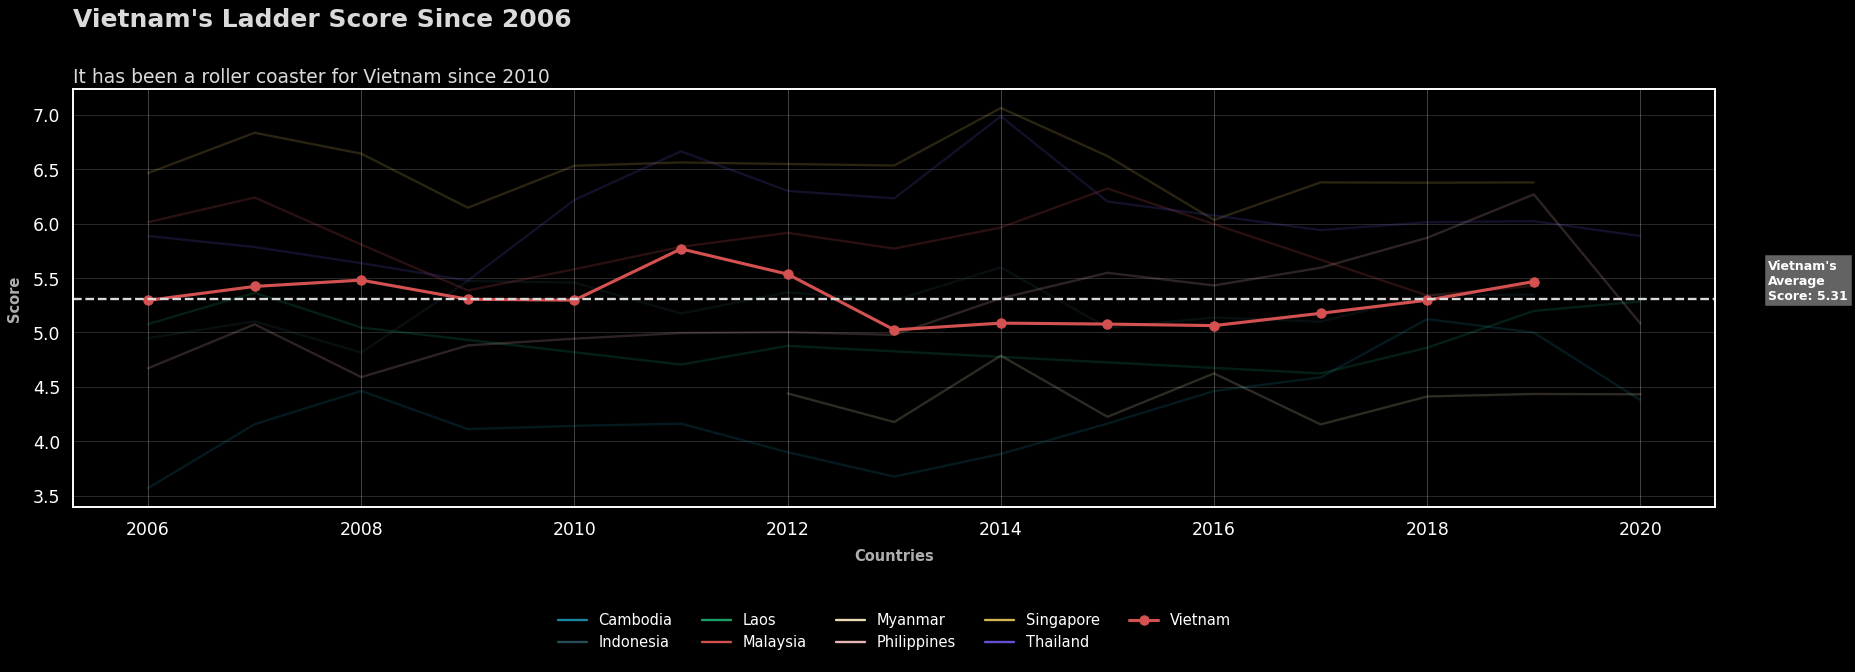

In [44]:
#@title
SEA = data_2021[data_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()
df = data[data['Country name'].isin(SEA)].set_index('Country name')
df_idn = df.loc['Vietnam']
df = df.reset_index()
df = df[df['Country name'] != "Vietnam"]
mean_idn = df_idn['Life Ladder'].mean()

fig, ax = plt.subplots(figsize=(25, 10), dpi=75)

line0 = sns.lineplot(data=df, x='year', y='Life Ladder', hue='Country name', alpha=0.2, ax=ax, palette=colors_mix[:8])
line1 = ax.plot(df_idn.year, df_idn['Life Ladder'], alpha=1, marker='o', color=colors_red[3], linewidth=3, label='Vietnam')
line2 = ax.axhline(mean_idn, linestyle='--', alpha=1, color=colors_dark[4])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=14)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Vietnam's\nAverage\nScore: {:.2f}".format(mean_idn),
    x=xmax+0.5,
    y=mean_idn,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)

plt.text(s="Vietnam's Ladder Score Since 2006", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("It has been a roller coaster for Vietnam since 2010", loc='left', fontsize=18, color=colors_dark[4])  
plt.tight_layout()
plt.show()

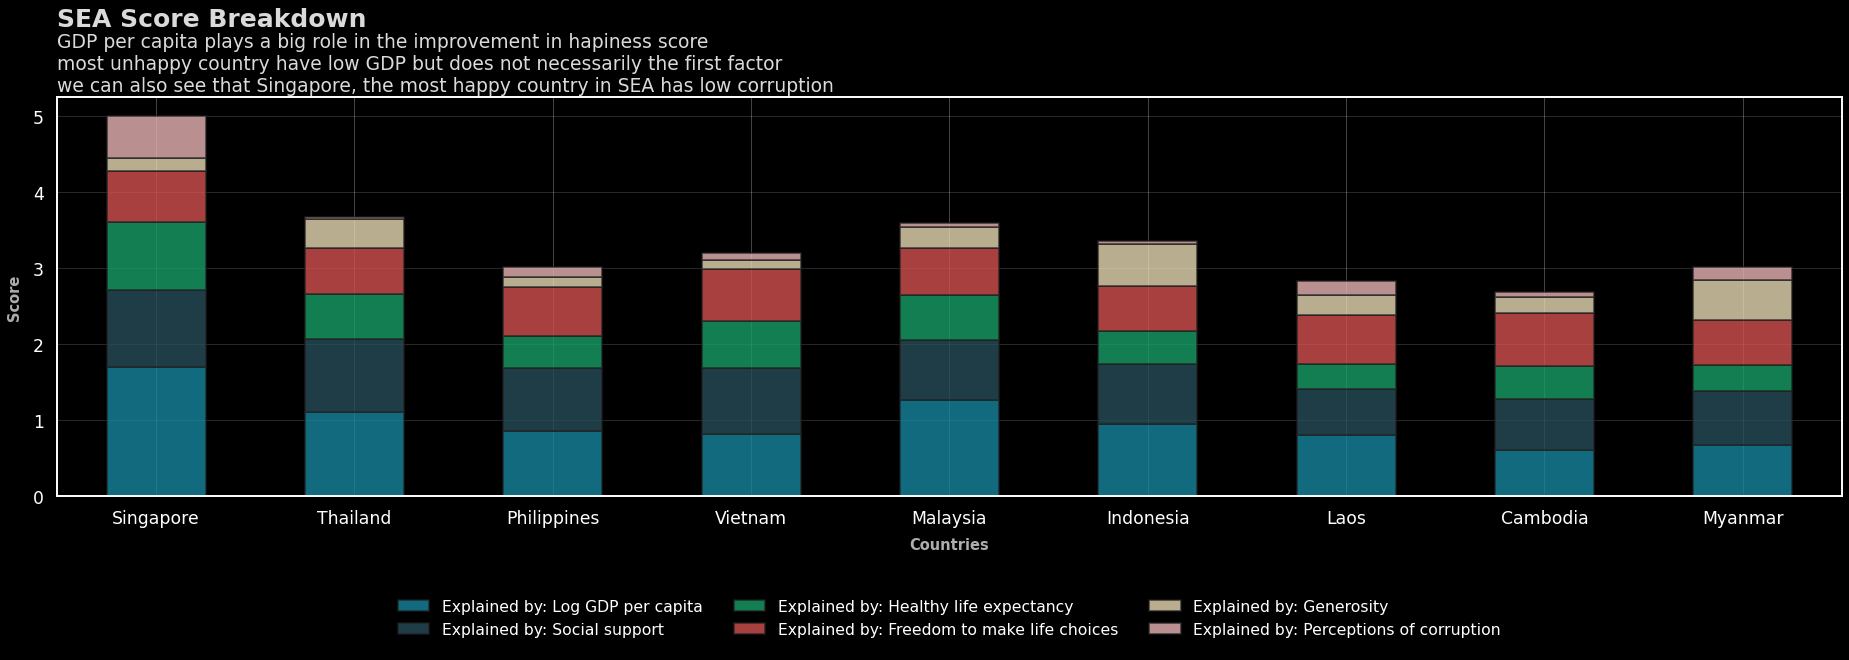

In [45]:
#@title
components = list(data_2021.columns[-7:-1])
df = data_2021[data_2021['Country name'].isin(SEA)]
df = df[["Country name"] + components].set_index("Country name")

fig, ax = plt.subplots(figsize=(25, 10), dpi=75)

bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_mix[0:7], alpha=0.8, edgecolor=colors_dark[0], rot=0)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, borderpad=1, frameon=False, fontsize=15)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="SEA Score Breakdown", ha='left', x=xmin, y=ymax*1.18, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("GDP per capita plays a big role in the improvement in hapiness score\nmost unhappy country have low GDP but does not necessarily the first factor\nwe can also see that Singapore, the most happy country in SEA has low corruption", loc='left', fontsize=18, color=colors_dark[4])  
plt.tight_layout()
plt.show()

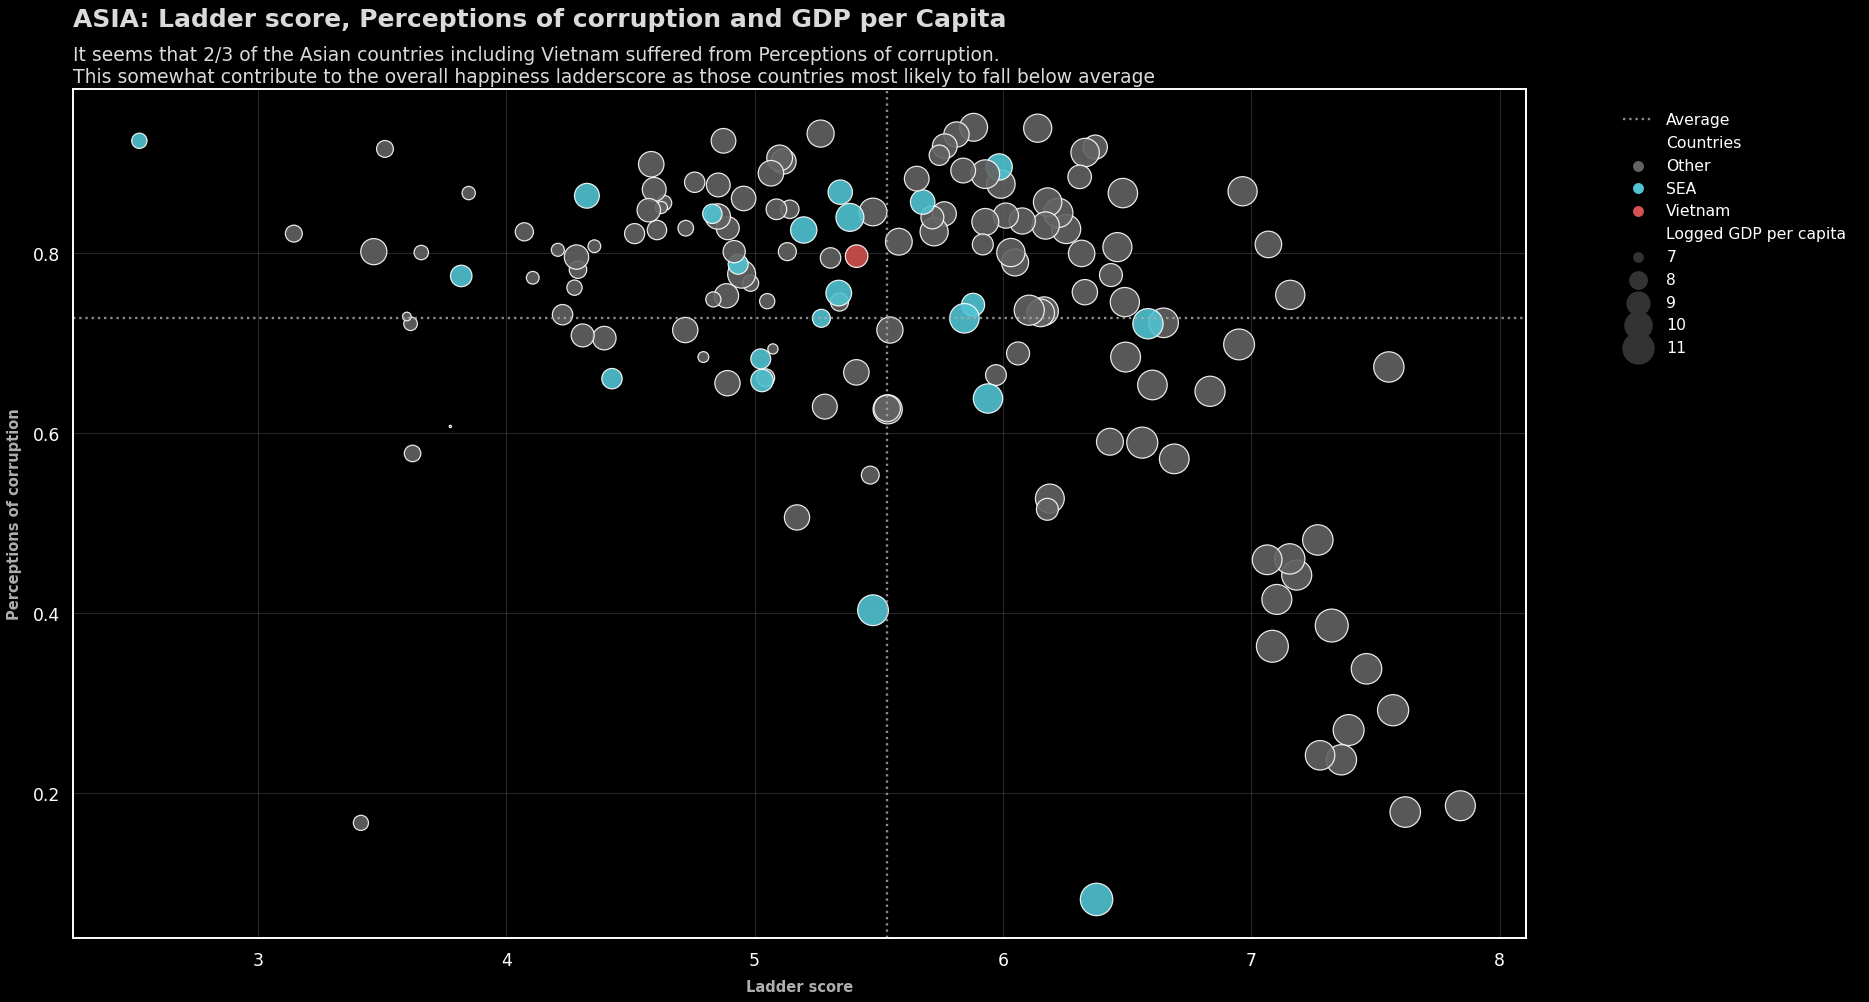

In [46]:
#@title
df = data_2021
df['Countries'] = df.apply(lambda x: getA(x), axis=1)
meanx=df['Ladder score'].mean()
meany=df['Perceptions of corruption'].mean()
singx=df[df['Country name'] == 'Vietnam']['Ladder score']
singy=df[df['Country name'] == 'Vietnam']['Perceptions of corruption']

fig, ax = plt.subplots(figsize=(25, 15), dpi=75)

sns.scatterplot(
    data=df, 
    x='Ladder score', 
    y='Perceptions of corruption', 
    size='Logged GDP per capita', 
    ax=ax, sizes=(5, 1000),
    alpha=0.9,
    hue='Countries',
    palette=[colors_dark[2], colors_blue[3], colors_red[3]]
)
linex = ax.axvline(meanx, linestyle='dotted', color=colors_dark[3], alpha=0.8, label='Average')
liney = ax.axhline(meany, linestyle='dotted', color=colors_dark[3], alpha=0.8)


ax.legend(bbox_to_anchor=(1.05, 1), ncol=1, borderpad=1, frameon=False, fontsize=15)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Ladder score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
ax.set_ylabel("Perceptions of corruption", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[3])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


plt.text(s="ASIA: Ladder score, Perceptions of corruption and GDP per Capita\n", ha='left', x=xmin, y=ymax*1.04, fontsize=24, fontweight='bold', color=colors_dark[4])
plt.title("It seems that 2/3 of the Asian countries including Vietnam suffered from Perceptions of corruption. \nThis somewhat contribute to the overall happiness ladderscore as those countries most likely to fall below average", loc='left', fontsize=18, color=colors_dark[4])  

plt.show()